

# Effect of vertical resolution on MCS simulation 

In [1]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import datetime
import matplotlib.colors as colors
from pathlib import Path
import seaborn as sns

In [2]:
from metpy.units import units
import metpy.calc as mcalc

In [3]:
def select_time(data, start, end, timedim, times):
    """                                                                                                                                                        
    Extracting specific time steps from input xarray data.                                                                                                    

    Note that time dimension needs to be redefined for this, since the WRF output dimension Time 
    only contains the indices and not the actual timestamps. 
                                                                                                                                                             
    Args:                                                                                                                                                      
    start(str): start time yyyy-mm-dd-hh                                                                                                                      
    end(str):end time yyyy-mm-dd-hh                                                                                                                         

    timedim(str): name of time dimension in dataset
    times(array-like): array or list with timestamps 
    """
    # use time variable as dimension                                                                                                                           
    data = data.swap_dims({timedim : "time"})
    data = data.assign_coords({'time': times})
    # subset dataset                                                                                                                                           
    data = data.sel(time = slice(start,end ))
    return data

In [4]:
year = 2008 
month = 7 
start= datetime.datetime(year, month, 19, 0)
end = datetime.datetime(year,month, 21 , 23 )

In [5]:
### comaprison to NCAR run at 12 and 4km 

# D1
#fname= '/glade/campaign/mmm/c3we/prein/CPTP/data/CASES_Ensemble/MCS/pr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc'
fname= '/glade/scratch/kukulies/CPTP/4km_timelag/postprocessed/pr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080718-20080724.nc'
fname= '/glade/scratch/kukulies/wrf_processed/ensemble/pr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i5p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc' 


wrf = xr.open_dataset(fname)
precip= select_time(wrf.pr , start, end, 'Time', wrf.time.values ).sum('time') *3600

# D2
fname4km= '/glade/campaign/mmm/c3we/prein/CPTP/data/CASES_Ensemble/MCS/pr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i2p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc'
wrf4km = xr.open_dataset(fname4km)
precip4km = select_time(wrf4km.pr * 3600, start, end, 'Time', wrf4km.time.values ).sum('time') 


# non convective and convective precip for 12km simulation 
fname12km = '/glade/scratch/kukulies/wrf_processed/case12km/postprocessed/pr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724_cumulus.nc'
fname12km_nc = '/glade/scratch/kukulies/wrf_processed/case12km/postprocessed/pr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc'
wrf12km = xr.open_dataset(fname12km)
precip12km = select_time(wrf12km.pr * 3600, start, end, 'Time', wrf12km.time.values ).sum('time') 
wrf12km_nc = xr.open_dataset(fname12km_nc)
precip12km_nc = select_time(wrf12km_nc.pr * 3600, start, end, 'Time', wrf12km.time.values ).sum('time') 
precip12km_total = precip12km+ precip12km_nc

In [15]:
ref_fname= '/glade/scratch/kukulies/CPTP/8km_ref/postprocessed/pr_CPTP-MCS-8_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc'
vertical_fname = '/glade/scratch/kukulies/CPTP/8km_vertical/postprocessed/pr_CPTP-MCS-8_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc'

ref = xr.open_dataset(ref_fname)
vertical = xr.open_dataset(vertical_fname)
year = 2008 
month = 7 
start= datetime.datetime(year, month, 19, 0)
end = datetime.datetime(year,month, 21 , 23 )

ref_precip = select_time(ref.pr * 3600, start, end, 'Time', ref.time.values ).sum('time') 
vertical_precip = select_time(vertical.pr * 3600, start, end, 'Time', ref.time.values ).sum('time') 

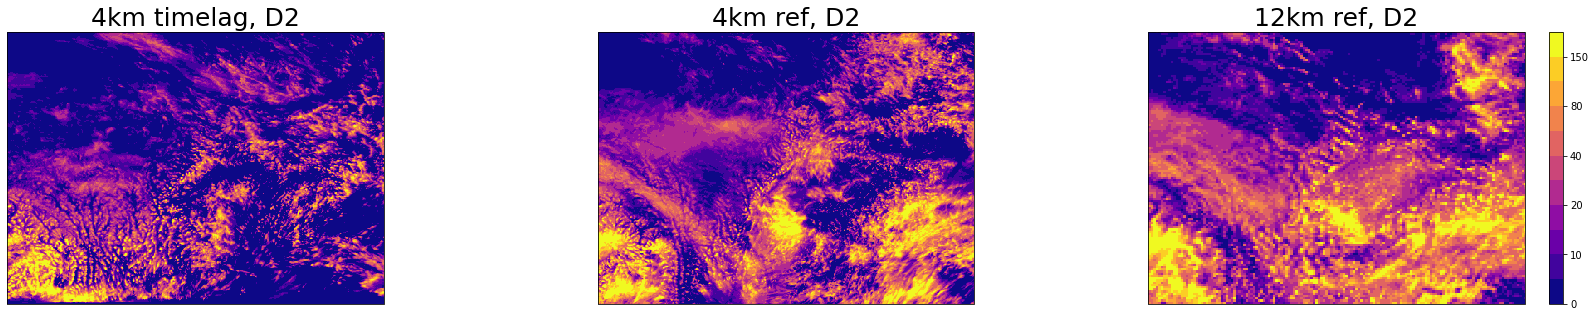

In [16]:
plt.figure(figsize=(30,5) )
# customizing of colorbar 
cmap=plt.cm.plasma
r = np.array([0,5,10,15,20,30,40,60,80,100,150,200])
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)
fs = 25


ax = plt.subplot(1, 3, 1 , projection=ccrs.PlateCarree())
ax.set_extent([95,113,25,38])
ax.set_title('4km timelag, D2', fontsize= fs)
m=ax.pcolormesh(wrf.lon, wrf.lat, precip,  cmap = cmap, norm = norm , shading = 'auto')

ax = plt.subplot(1, 3, 2 , projection=ccrs.PlateCarree())
ax.set_extent([95,113,25,38])
ax.set_title('4km ref, D2', fontsize= fs)
m=ax.pcolormesh(wrf4km.lon, wrf4km.lat, precip4km,  cmap = cmap, norm = norm , shading = 'auto')

ax = plt.subplot(1, 3, 3 , projection=ccrs.PlateCarree())
ax.set_extent([95,113,25,38])
ax.set_title('12km ref, D2', fontsize = fs)
m=ax.pcolormesh(wrf12km.lon, wrf12km.lat, precip12km_total,  cmap = cmap, norm = norm ,  shading = 'auto')
plt.colorbar(m)
plt.show()

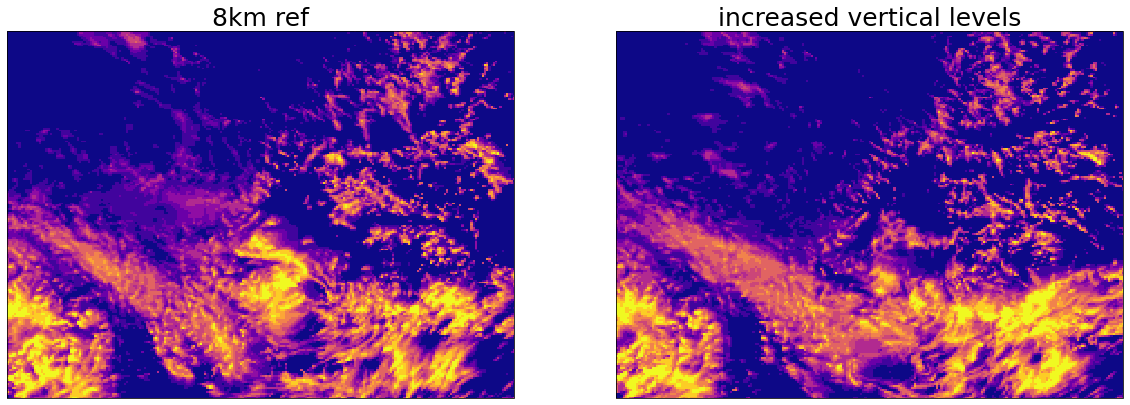

In [4]:
plt.figure(figsize=(20,10) )
# customizing of colorbar 
cmap=plt.cm.plasma
r = np.array([0,5,10,15,20,30,40,60,80,100,150,200])
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)
fs = 25 

ax = plt.subplot(1, 2, 1 , projection=ccrs.PlateCarree())
ax.set_extent([95,113,25,38])
ax.set_title('8km ref', fontsize= fs)
m=ax.pcolormesh(ref.lon, ref.lat, ref_precip ,  cmap = cmap, norm = norm , shading = 'auto')

ax = plt.subplot(1, 2, 2 , projection=ccrs.PlateCarree())
ax.set_extent([95,113,25,38])
ax.set_title('increased vertical levels', fontsize = fs)
m=ax.pcolormesh(ref.lon, ref.lat, vertical_precip,  cmap = cmap, norm = norm ,  shading = 'auto')

plt.show()

## Hovmoller diagrams of new experiment 

In [6]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [7]:
minlat = 33
maxlat = 36
dlat = 0.25

In [8]:
era5= xr.open_dataset('/glade/scratch/kukulies/kukulies032022/data/ERA5/ERA5_vorticity.nc')
era5_rv = era5.relative_vorticity
era5_rv_filt = era5.relative_vorticity_filtered

# select latitude band 
latband = era5_rv.sel(latitude = np.arange(minlat, maxlat, dlat)) 
latband_filt = era5_rv_filt.sel(latitude = np.arange(minlat,maxlat, dlat)) 

# mean over latitude 
mean = latband.mean('latitude')
mean_filt = latband_filt.mean('latitude')

times = mean.time.values

In [9]:
### NCAR WRF 8km ###

wrf8km= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF8km_ref_VORT.nc')
wrf8km_rv = wrf8km.relative_vorticity_filtered
wrf8km_mean = wrf8km_rv.where( (wrf8km.XLAT >  minlat ) & (wrf8km.XLAT < maxlat ) , drop = True ).mean('south_north')
wrf8km_lons = wrf8km.XLONG.values[0,:]

### NCAR WRF 8km - increased vertical resolution###
wrf8kmV= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF8km_vertical_VORT.nc')
wrf8kmV_rv = wrf8kmV.relative_vorticity_filtered
wrf8kmV_mean = wrf8kmV_rv.where( (wrf8kmV.XLAT >  minlat ) & (wrf8kmV.XLAT < maxlat ) , drop = True ).mean('south_north')
wrf8kmV_lons = wrf8kmV.XLONG.values[0,:]


wrf4km= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_L_VORT.nc')
wrf4km_rv = wrf4km.relative_vorticity_filtered
wrf4km_mean = wrf4km_rv.where( (wrf4km.XLAT >  minlat ) & (wrf4km.XLAT < maxlat ) , drop = True ).mean('south_north')
wrf4km_lons = wrf4km.XLONG.values[0,:]

In [10]:
### NCAR 12 km and 4km timelag as comparison 

wrf4kmT= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_timelag_VORT.nc')
wrf4kmT_rv = wrf4kmT.relative_vorticity_filtered
wrf4kmT_mean = wrf4kmT_rv.where( (wrf4kmT.XLAT >  minlat ) & (wrf4kmT.XLAT < maxlat ) , drop = True ).mean('south_north')
wrf4kmT_lons = wrf4kmT.XLONG.values[0,:]


wrf12km= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF12km_VORT.nc')
wrf12km_rv = wrf12km.relative_vorticity_filtered
wrf12km_mean = wrf12km_rv.where( (wrf12km.XLAT >  minlat ) & (wrf12km.XLAT < maxlat ), drop = True ).mean('south_north')
wrf12km_lons = wrf12km.XLONG.values[0,:]

In [11]:
# fix ticks and indicators 

ticks = np.arange(70,120,10)
wrf12km_ticks = np.array(())
wrf8km_ticks = np.array(())
wrf4km_ticks = np.array(())
for tick in ticks:
    wrf12km_ticks = np.append(wrf12km_ticks, find_nearest_idx(wrf12km_lons, tick)[0])
    wrf8km_ticks = np.append(wrf8km_ticks, find_nearest_idx(wrf8km_lons, tick)[0])
    wrf4km_ticks = np.append(wrf4km_ticks, find_nearest_idx(wrf4km_lons, tick)[0])
    
    
lon1= 80
lon2 = 103

wrf12km_idx1 , lon= find_nearest_idx(wrf12km_lons, lon1) 
wrf12km_idx2 , lon= find_nearest_idx(wrf12km_lons, lon2)

wrf8km_idx1 , lon= find_nearest_idx(wrf8km_lons, lon1) 
wrf8km_idx2 , lon= find_nearest_idx(wrf8km_lons, lon2)

wrf4km_idx1 , lon= find_nearest_idx(wrf4km_lons, lon1) 
wrf4km_idx2 , lon= find_nearest_idx(wrf4km_lons, lon2)


In [ ]:
fig = plt.figure(figsize= (30,6))

import seaborn as sns 
cmap = sns.color_palette("vlag_r", as_cmap=True)
r = np.arange(-0.4, 0.4, 0.1)
r = np.arange(-6, 7, 1)

fs = 24
lw = 3.0
ax = plt.subplot(1, 3, 1)
m=ax.contourf(mean.longitude.values, times[96:] , mean_filt.values[96:, :]*10, cmap=cmap,levels = r, extend= 'both')
ax.set_title('ERA5', fontsize = fs)
ax.axvline(80,color='k', linestyle='--', lw= lw)
ax.axvline(103,color= 'k', linestyle='--', lw= lw)
ax.set_xlim(65,119)
ax.set_xlabel('Lon [$^\circ$N]', fontsize = 16)


ax = plt.subplot(1, 3, 2)
m=ax.contourf(wrf4km_mean.west_east.values, times[96:], wrf4km_mean.values[96:, :],  cmap=cmap,levels = r, extend= 'both')
ax.set_title('WRF$_{D2}$', fontsize = fs)
ax.set_xticks(wrf4km_ticks)
ax.set_yticks([])
ax.set_xticklabels(ticks) 
ax.axvline(wrf4km_idx1,color='k', linestyle='--', lw= lw)
ax.axvline(wrf4km_idx2,color= 'k', linestyle='--', lw= lw)
ax.set_xlabel('Lon [$^\circ$N]', fontsize = 16)

ax = plt.subplot(1, 3, 3)
m=ax.contourf(wrf4kmT_mean.west_east.values, times[96:], wrf4kmT_mean.values, cmap=cmap,levels = r, extend= 'both')
ax.set_title('WRF$_{timelag}$', fontsize = fs)
ax.set_yticks([])
ax.set_xticks(wrf4km_ticks)
ax.set_xticklabels(ticks) 
ax.axvline(wrf4km_idx1,color='k', linestyle='--', lw= lw)
ax.axvline(wrf4km_idx2,color= 'k', linestyle='--', lw= lw)
ax.set_xlabel('Lon [$^\circ$N]', fontsize = 16)


cb_ax2 = fig.add_axes([0.92, 0.12,0.01, 0.78])
cbar = fig.colorbar(m, cax=cb_ax2, ticks = r, drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'rv @500 hPa [10e-5 s$^{-1}$]', size=22)
plt.rcParams.update({'font.size': 20})

plt.savefig('plots/response_letter_vorticity_timelag.png',facecolor = 'white', transparent = False, bbox_inches = 'tight' )
plt.show()

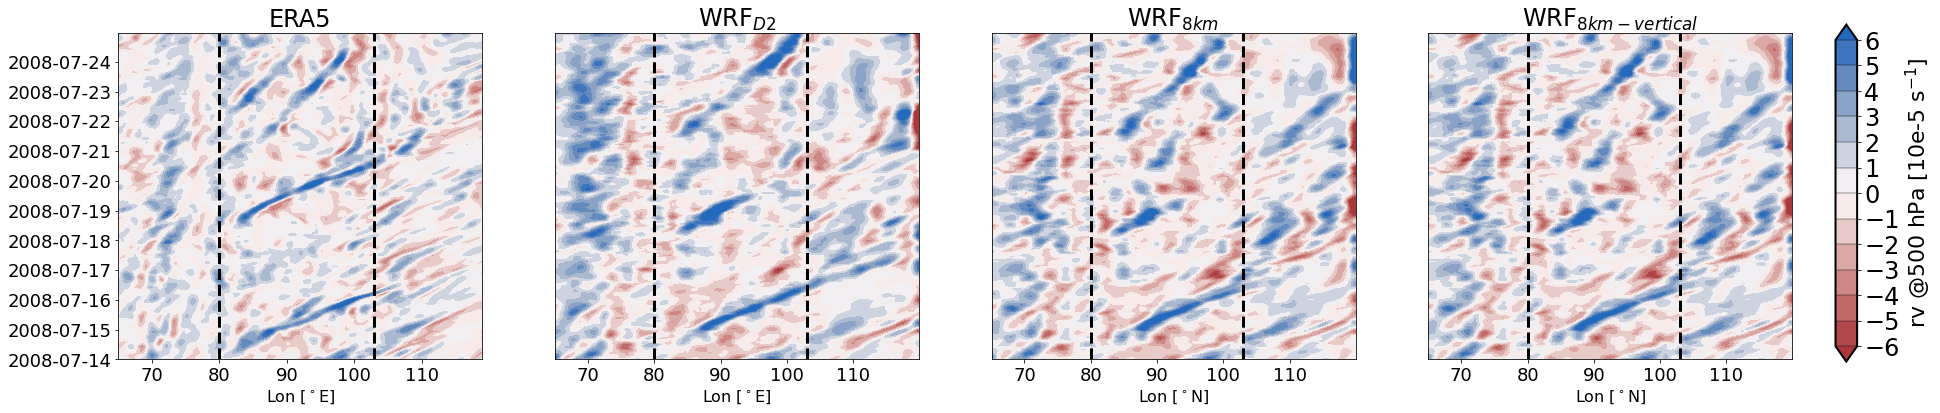

In [14]:
fig = plt.figure(figsize= (30,6))

import seaborn as sns 
cmap = sns.color_palette("vlag_r", as_cmap=True)
r = np.arange(-0.4, 0.4, 0.1)
r = np.arange(-6, 7, 1)

fs = 24
lw = 3.0
ax = plt.subplot(1, 4, 3)
m=ax.contourf(  wrf8km_mean.west_east.values,times ,wrf8km_mean.values, cmap=cmap,levels = r, extend= 'both')
ax.set_title('WRF$_{8km}$ ', fontsize = fs )
ax.set_xticks(wrf8km_ticks)
ax.set_xticklabels(ticks)
ax.set_yticks([])
ax.axvline(wrf8km_idx1,color='k', linestyle='--', lw= lw)
ax.axvline(wrf8km_idx2,color= 'k', linestyle='--', lw= lw)  
ax.set_xlabel('Lon [$^\circ$N]', fontsize = 16)

ax = plt.subplot(1, 4, 4)
m=ax.contourf(wrf8kmV_mean.west_east.values, times, wrf8kmV_mean.values, cmap=cmap,levels = r, extend= 'both')
ax.set_title('WRF$_{8km-vertical}$', fontsize = fs)
ax.set_xticks(wrf8km_ticks)
ax.set_yticks([])
ax.set_xticklabels(ticks) 
ax.axvline(wrf8km_idx1,color='k', linestyle='--', lw= lw)
ax.axvline(wrf8km_idx2,color= 'k', linestyle='--', lw= lw)
ax.set_xlabel('Lon [$^\circ$N]', fontsize = 16)

ax = plt.subplot(1, 4, 2)
m=ax.contourf(wrf4km_mean.west_east.values, times, wrf4km_mean.values, cmap=cmap,levels = r, extend= 'both')
ax.set_title('WRF$_{D2}$', fontsize = fs)
ax.set_yticks([])
ax.set_xticks(wrf4km_ticks)
ax.set_xticklabels(ticks) 
ax.axvline(wrf4km_idx1,color='k', linestyle='--', lw= lw)
ax.axvline(wrf4km_idx2,color= 'k', linestyle='--', lw= lw)
ax.set_xlabel('Lon [$^\circ$E]', fontsize = 16)

ax = plt.subplot(1, 4, 1)
m=ax.contourf(mean.longitude.values, times , mean_filt.values*10, cmap=cmap,levels = r, extend= 'both')
ax.set_title('ERA5', fontsize = fs)
ax.axvline(80,color='k', linestyle='--', lw= lw)
ax.axvline(103,color= 'k', linestyle='--', lw= lw)
ax.set_xlim(65,119)
ax.set_xlabel('Lon [$^\circ$E]', fontsize = 16)


cb_ax2 = fig.add_axes([0.92, 0.12,0.01, 0.78])
cbar = fig.colorbar(m, cax=cb_ax2, ticks = r, drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'rv @500 hPa [10e-5 s$^{-1}$]', size=22)
plt.rcParams.update({'font.size': 18})

plt.savefig('plots/response_letter_vorticity.png',facecolor = 'white', transparent = False, bbox_inches = 'tight' )
plt.show()

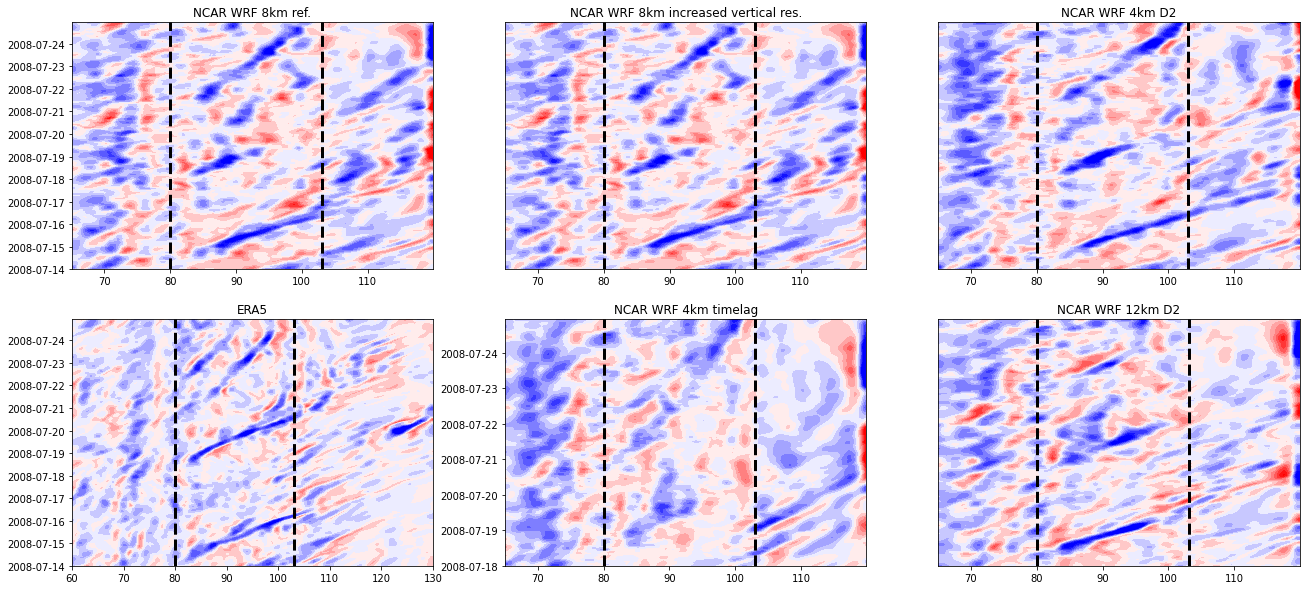

In [25]:
plt.figure(figsize= (22,10))

cmap= plt.cm.bwr_r
r = np.arange(-0.4, 0.4, 0.1)
r = np.arange(-7, 8, 1)


lw = 3.0
ax = plt.subplot(2, 3, 1)
m=ax.contourf(  wrf8km_mean.west_east.values,times ,wrf8km_mean.values, cmap=cmap,levels = r, extend= 'both')
ax.set_title('NCAR WRF 8km ref.')
ax.set_xticks(wrf8km_ticks)
ax.set_xticklabels(ticks)
ax.axvline(wrf8km_idx1,color='k', linestyle='--', lw= lw)
ax.axvline(wrf8km_idx2,color= 'k', linestyle='--', lw= lw)  

ax = plt.subplot(2, 3, 2)
m=ax.contourf(wrf8kmV_mean.west_east.values, times, wrf8kmV_mean.values, cmap=cmap,levels = r, extend= 'both')
ax.set_title('NCAR WRF 8km increased vertical res.')
ax.set_xticks(wrf8km_ticks)
ax.set_yticks([])
ax.set_xticklabels(ticks) 
ax.axvline(wrf8km_idx1,color='k', linestyle='--', lw= lw)
ax.axvline(wrf8km_idx2,color= 'k', linestyle='--', lw= lw)

ax = plt.subplot(2, 3, 3)
m=ax.contourf(wrf4km_mean.west_east.values, times, wrf4km_mean.values, cmap=cmap,levels = r, extend= 'both')
ax.set_title('NCAR WRF 4km D2')
ax.set_yticks([])
ax.set_xticks(wrf4km_ticks)
ax.set_xticklabels(ticks) 
ax.axvline(wrf4km_idx1,color='k', linestyle='--', lw= lw)
ax.axvline(wrf4km_idx2,color= 'k', linestyle='--', lw= lw)


ax = plt.subplot(2, 3, 4)
m=ax.contourf(mean.longitude.values, times , mean_filt.values*10, cmap=cmap,levels = r, extend= 'both')
ax.set_title('ERA5')
ax.axvline(80,color='k', linestyle='--', lw= lw)
ax.axvline(103,color= 'k', linestyle='--', lw= lw)



ax = plt.subplot(2, 3, 5)
m=ax.contourf(wrf4kmT_mean.west_east.values, times[96:], wrf4kmT_mean.values, cmap=cmap,levels = r, extend= 'both')
ax.set_title('NCAR WRF 4km timelag')
ax.set_xticks(wrf4km_ticks)
ax.set_xticklabels(ticks) 
ax.axvline(wrf4km_idx1,color='k', linestyle='--', lw= lw)
ax.axvline(wrf4km_idx2,color= 'k', linestyle='--', lw= lw)


ax = plt.subplot(2, 3, 6)
m=ax.contourf(wrf12km_mean.west_east.values, times, wrf12km_mean.values, cmap=cmap,levels = r, extend= 'both')
ax.set_title('NCAR WRF 12km D2')
ax.set_yticks([])
ax.set_xticks(wrf12km_ticks)
ax.set_xticklabels(ticks) 
ax.axvline(wrf12km_idx1,color='k', linestyle='--', lw= lw)
ax.axvline(wrf12km_idx2,color= 'k', linestyle='--', lw= lw)

plt.show()

# How does the jet stream look like? 

In [4]:
import matplotlib.colors as colors
import cartopy.crs as ccrs
%matplotlib inline
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
from pathlib import Path

In [4]:
# choose times 
wrft1 = '2008-07-19_12:00:00'
wrft2= '2008-07-19_23:00:00'
jet= dict()
lats = dict()
lons= dict()
geop= dict()

wrf_dir = Path('/glade/scratch/kukulies/wrf_processed/')
jet['WRF8km$_{ref}$ 07-19'] = xr.open_dataset(wrf_dir / 'WRF8km_ref_u200hpa.nc').U_PL.sel(time= slice(wrft1,wrft2)).mean('time')
jet['WRF8km$_{vert}$ 07-19'] = xr.open_dataset(wrf_dir / 'WRF8km_vertical_u200hpa.nc').U_PL.sel(time= slice(wrft1,wrft2)).mean('time')

geop['WRF8km$_{ref}$ 07-19'] = xr.open_dataset(wrf_dir / 'WRF8km_ref_z500hpa.nc').GHT_PL.sel(time= slice(wrft1,wrft2)).mean('time') - xr.open_dataset(wrf_dir / 'WRF8km_ref_z500hpa.nc').GHT_PL.mean('time')
geop['WRF8km$_{vert}$ 07-19'] = xr.open_dataset(wrf_dir / 'WRF8km_vertical_z500hpa.nc').GHT_PL.sel(time= slice(wrft1,wrft2)).mean('time') -  xr.open_dataset(wrf_dir / 'WRF8km_vertical_z500hpa.nc').GHT_PL.mean('time')

lats['WRF8km$_{ref}$ 07-19'] =xr.open_dataset(wrf_dir / 'WRF8km_ref_u200hpa.nc').XLAT.values[0]
lons['WRF8km$_{ref}$ 07-19'] = xr.open_dataset(wrf_dir / 'WRF8km_ref_u200hpa.nc').XLONG.values[0]
lats['WRF8km$_{vert}$ 07-19'] =xr.open_dataset(wrf_dir / 'WRF8km_ref_u200hpa.nc').XLAT.values[0]
lons['WRF8km$_{vert}$ 07-19'] = xr.open_dataset(wrf_dir / 'WRF8km_ref_u200hpa.nc').XLONG.values[0]


wrft1 = '2008-07-20_12:00:00'
wrft2= '2008-07-20_23:00:00'
jet['WRF8km$_{ref}$ 07-20'] = xr.open_dataset(wrf_dir / 'WRF8km_ref_u200hpa.nc').U_PL.sel(time= slice(wrft1,wrft2)).mean('time')
jet['WRF8km$_{vert}$ 07-20'] = xr.open_dataset(wrf_dir / 'WRF8km_vertical_u200hpa.nc').U_PL.sel(time= slice(wrft1,wrft2)).mean('time')
geop['WRF8km$_{ref}$ 07-20'] = xr.open_dataset(wrf_dir / 'WRF8km_ref_z500hpa.nc').GHT_PL.sel(time= slice(wrft1,wrft2)).mean('time') - xr.open_dataset(wrf_dir / 'WRF8km_ref_z500hpa.nc').GHT_PL.mean('time')
geop['WRF8km$_{vert}$ 07-20'] = xr.open_dataset(wrf_dir / 'WRF8km_vertical_z500hpa.nc').GHT_PL.sel(time= slice(wrft1,wrft2)).mean('time') -  xr.open_dataset(wrf_dir / 'WRF8km_vertical_z500hpa.nc').GHT_PL.mean('time')

lats['WRF8km$_{ref}$ 07-20'] =xr.open_dataset(wrf_dir / 'WRF8km_ref_u200hpa.nc').XLAT.values[0]
lons['WRF8km$_{ref}$ 07-20'] = xr.open_dataset(wrf_dir / 'WRF8km_ref_u200hpa.nc').XLONG.values[0]
lats['WRF8km$_{vert}$ 07-20'] =xr.open_dataset(wrf_dir / 'WRF8km_ref_u200hpa.nc').XLAT.values[0]
lons['WRF8km$_{vert}$ 07-20'] = xr.open_dataset(wrf_dir / 'WRF8km_ref_u200hpa.nc').XLONG.values[0]

/glade/u/home/kukulies/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


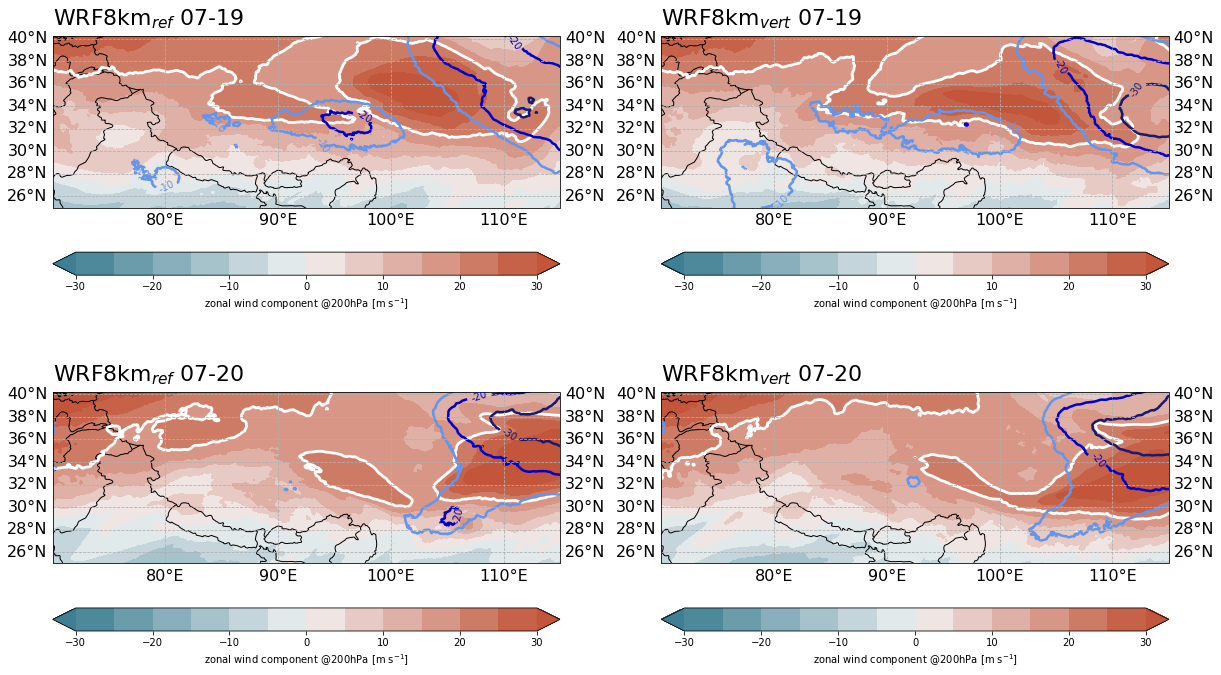

In [10]:
plt.figure(figsize=(20,12))
import seaborn as sns
cmap = sns.diverging_palette(220, 20, as_cmap=True)
extent = [70,115,25,38]
fs = 22 
lw = 1.5
size = 14

subplots = 2
axes = dict()

axes['1'] = plt.subplot2grid(shape=(subplots, 2), loc=(0, 0), colspan=1, projection=ccrs.PlateCarree())
axes['2'] = plt.subplot2grid(shape=(subplots, 2), loc=(0, 1), colspan=1, projection=ccrs.PlateCarree())
axes['3'] = plt.subplot2grid(shape=(subplots, 2), loc=(1, 0), colspan=1, projection=ccrs.PlateCarree())
axes['4'] = plt.subplot2grid(shape=(subplots, 2), loc=(1, 1), colspan=1, projection=ccrs.PlateCarree())

# subplots with jet position and geopotential anomaly on 19th july 
for idx in np.arange(len(jet.keys())):
    key = list(jet.keys())[idx]
    ax = axes[str(idx+1)]
    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    m= ax.contourf(lons[key], lats[key], jet[key], levels = np.arange(-30,35,5), extend = 'both', cmap = cmap)
    J = ax.contour(lons[key], lats[key], jet[key], levels = [20], cmap = 'Greys', linewidths = [2.8])
    ax.set_title(key, fontsize =fs, loc = 'left')
    gl= ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle= '--')
    gl.top_labels = False
    gl.xlabel_style = {'size': 16, 'color': 'black'}
    gl.ylabel_style = {'size': 16, 'color': 'black'}
    CS=ax.contour(lons[key], lats[key], geop[key], levels = [-30, -20, -10], colors= ['midnightblue', 'mediumblue', 'cornflowerblue'], linewidths = [2.5])
    ax.clabel(CS, CS.levels, inline=True,fontsize=10, fmt =  '%1.0f')
    plt.colorbar(m,ax=ax, label ='zonal wind component @200hPa [m s$^{-1}$]', orientation = 'horizontal', extend=  'both')

plt.savefig('plots/response-letter_jet.png',facecolor = 'white', transparent = False, bbox_inches = 'tight' )
    
plt.show()

# Vertical cross sections of wind components and updrafts 

In [103]:
### add ERA5 data ###
day= 19

era= Path('/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.pl/200807')
# get all quantities 
uwind= xr.open_dataset(era / ('e5.oper.an.pl.128_131_u.ll025uv.200807'+str(day)+'00_200807'+str(day)+'23.nc'))
vwind= xr.open_dataset(era/ ('e5.oper.an.pl.128_132_v.ll025uv.200807'+str(day)+'00_200807'+str(day)+'23.nc'))
wwind= xr.open_dataset(era/ ('e5.oper.an.pl.128_135_w.ll025sc.200807'+str(day)+'00_200807'+str(day)+'23.nc'))
temperature = xr.open_dataset(era / ('e5.oper.an.pl.128_130_t.ll025sc.200807'+str(day)+'00_200807'+str(day)+'23.nc'))
pressure = np.flip(uwind.level.values, axis = 0)


# get data 
cross_sections= dict()
coords = dict()

variables = ['wwind', 'vwind', 'uwind']
for var in variables:
    cross_sections[var] = dict()
    cross_sections['pressure'] = dict()
    
# fix pressure
minlon, maxlon = 75,110
minlat, maxlat = 32,36
spres = xr.open_dataset('/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.sfc/200807/e5.oper.an.sfc.128_134_sp.ll025sc.2008070100_2008073123.nc')
sfc_pressure = spres.SP.where((spres.latitude > minlat) & (spres.latitude <maxlat)& (spres.longitude > minlon) & (spres.longitude <maxlon), drop = True)[12:23].mean('time').mean('latitude')
surface_pressure = np.flip(np.tile(sfc_pressure/100, (37,1)), axis =0)

# preprocess
meridional_uwind= uwind.where((uwind.latitude > minlat) & (uwind.latitude <maxlat)& (uwind.longitude > minlon) & (uwind.longitude <maxlon), drop = True).U[12:23].mean('time').mean('latitude')
meridional_vwind = vwind.where((vwind.latitude > minlat) & (vwind.latitude <maxlat)& (vwind.longitude > minlon) & (vwind.longitude <maxlon), drop = True).V[12:23].mean('time').mean('latitude')
meridional_wwind= wwind.where((wwind.latitude > minlat) & (wwind.latitude <maxlat)& (wwind.longitude > minlon) & (wwind.longitude <maxlon), drop = True).W[12:23].mean('time').mean('latitude')
meridional_temp= temperature.where((temperature.latitude > minlat) & (temperature.latitude <maxlat)& (temperature.longitude > minlon) & (temperature.longitude <maxlon), drop = True).T[12:23].mean('time').mean('latitude')
pressure_fld = np.tile(pressure, (wwind.where((wwind.latitude > minlat) & (wwind.latitude <maxlat)& (wwind.longitude > minlon) & (wwind.longitude <maxlon), drop = True).W[12:23].mean('time').mean('latitude').values.shape[-1], 1)).T

# convert vertical velocity to m/s 
wwind_ms= np.array(mcalc.vertical_velocity(np.flip(meridional_wwind.values, axis =0) * units.Pa / units.second, pressure_fld* units.mbar, meridional_temp.values* units.K))

cross_sections['pressure']['ERA5'] = pressure_fld
cross_sections['uwind']['ERA5'] = np.flip(meridional_uwind, axis = 0)
cross_sections['vwind']['ERA5'] = np.flip(meridional_vwind, axis = 0)
cross_sections['wwind']['ERA5'] = wwind_ms

# fix surface pressure 
for var in variables:
    if var == 'wwind':
         cross_sections[var]['ERA5'][pressure_fld > surface_pressure ] = np.nan
    else:
        cross_sections[var]['ERA5'].data[pressure_fld > surface_pressure ] = np.nan
        
coords['ERA5'] = np.tile(meridional_uwind.longitude.values, (37,1))

In [104]:
### add WRF experiments ###
files  = list(Path('/glade/scratch/kukulies/wrf_processed/').glob('vertical*cross*_'+str(day)+'_hourly.nc'))
files.sort()
names = ['WRF4km_spectral',  'WRF4km_L', 'WRF8km_ref','WRF8km_vertical']
for name in names:
    for var in variables:
        for file in files:
            if var in str(file) and name in str(file):
                ds= xr.open_dataarray(file)
                cross_sections[var][name] = ds[12:23].mean('Time')
                coords[name] = np.tile(ds.west_east.values, (levels,1))
            if 'pressure' in str(file) and name in str(file):
                ds = xr.open_dataarray(file)
                if 'vertical' in name:
                    levels = 99 
                else:
                    levels = 49
                cross_sections['pressure'][name] = ds.data
                

In [105]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

# get WRF ticks 4km and 8km 
# get right xticks to compare WRF lons to ERA5 
ticks = [80,90,100,110]
wrf4km_ticks = np.array(())
wrf8km_ticks = np.array(())
wrf4kmL_ticks = np.array(())

# get WRF lons 
wrf4km= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_MCS_VORT.nc').XLONG
wrf4kmL= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_L_VORT.nc').XLONG
wrf8km= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF8km_ref_VORT.nc').XLONG

# reduce to lon range 
minlon, maxlon = 75,110
wrf4kmL= wrf4kmL.where( (wrf4kmL > minlon) & (wrf4kmL < maxlon), drop = True).values[0,:]
wrf4km= wrf4km.where( (wrf4km > minlon) & (wrf4km < maxlon), drop = True).values[0,:]
wrf8km= wrf8km.where( (wrf8km > minlon) & (wrf8km < maxlon), drop = True).values[0,:]

for tick in ticks:
    wrf4km_ticks= np.append(wrf4km_ticks, find_nearest_idx(wrf4km, tick)[0])
    wrf4kmL_ticks= np.append(wrf4kmL_ticks, find_nearest_idx(wrf4kmL, tick)[0])
    wrf8km_ticks= np.append(wrf8km_ticks, find_nearest_idx(wrf8km, tick)[0])

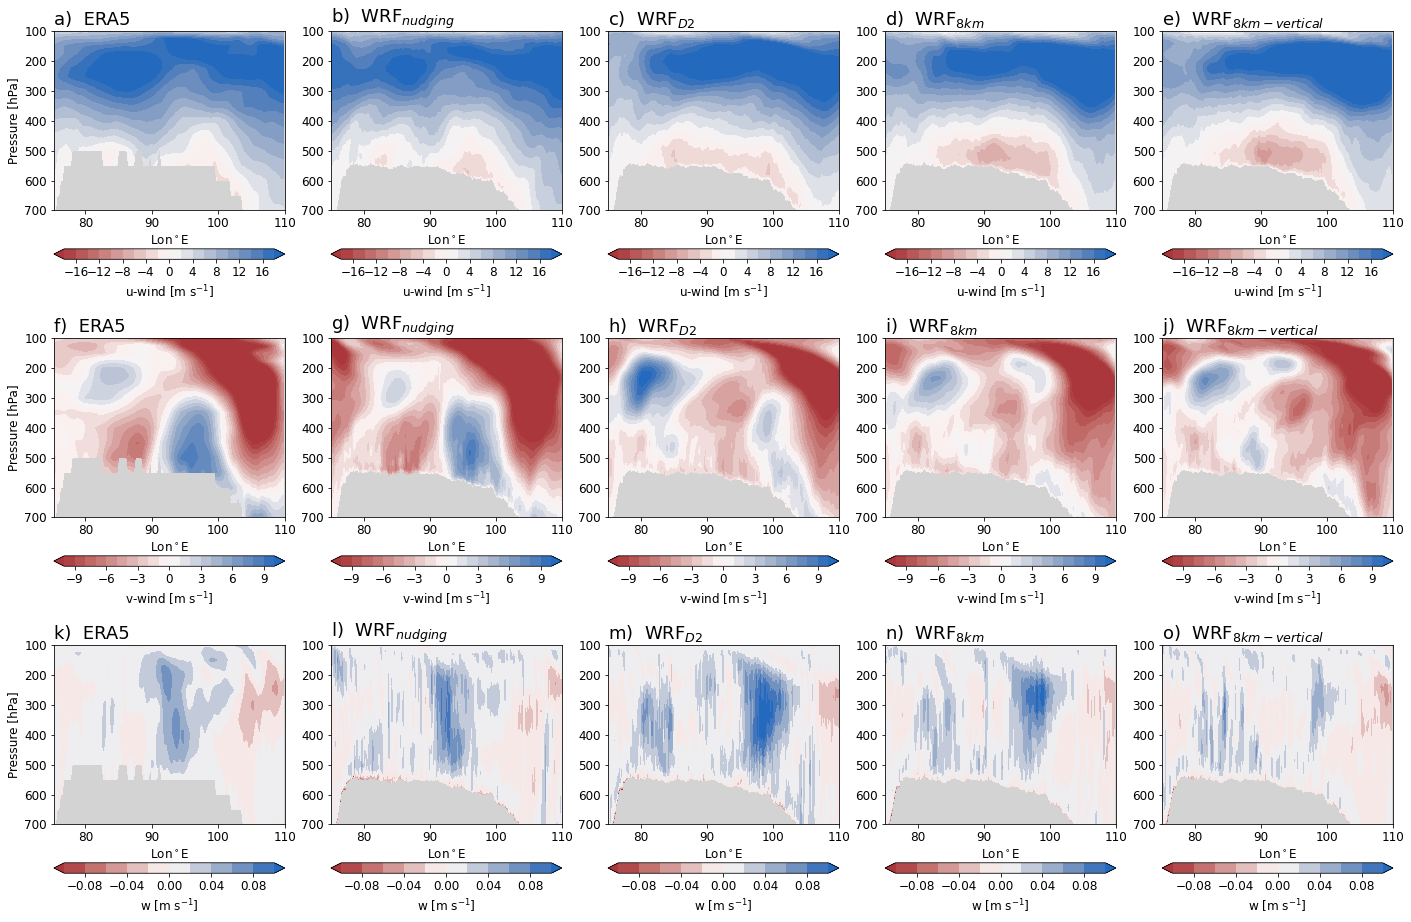

In [106]:

import matplotlib
plt.figure(figsize=(24,16))


letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n','o']

# colorbar ranges
crange= dict()
crange['uwind'] = np.arange(-24,28,4)
crange['vwind'] = np.arange(-12,14,2)
crange['wwind'] = np.arange(-0.2,0.22,0.02)
crange['n_squared'] = np.arange(0.2e-5,3e-5, 0.000005)
#norm= colors.BoundaryNorm(boundaries= crange[var],  ncolors= 256)

# colorbar ranges
vmin= dict()
vmin['uwind'] = -10
vmin['vwind'] = -8
vmin['wwind'] = -0.1
vmin['n_squared'] = 0.1e-5
# colorbar ranges
vmax= dict()
vmax['uwind'] =20
vmax['vwind'] = 8
vmax['wwind'] = 0.1
vmax['n_squared'] = 2e-5

cmap = dict()
div_cmap = sns.color_palette("vlag_r", as_cmap=True)
cmap['uwind'] = div_cmap
cmap['vwind'] = div_cmap
cmap['wwind'] = div_cmap 
cmap['n_squared'] =sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

# levels for contour plot 
clevels = dict()
clevels['vwind'] = np.arange(-10,11,1)
clevels['uwind'] = np.arange(-18,20,2)
clevels['wwind'] = np.arange(-0.1,0.12,0.02)

rows = 3
columns = 5
fs = 18
count = 1 
newstart=0 
title = ['ERA5', 'WRF$_{nudging}$', 'WRF$_{D2}$', 'WRF$_{8km}$','WRF$_{8km-vertical}$']
variables = ['uwind', 'vwind','wwind' ]
labels = [ 'u-wind [m s$^{-1}$]', 'v-wind [m s$^{-1}$]','w [m s$^{-1}$]' ]
for var_idx,var in enumerate(np.array(variables )):
    for idx, exp in enumerate(list(cross_sections['uwind'].keys())):
        cross_section = cross_sections[var][exp]
        ax = plt.subplot(rows, columns, count)
        ax.set_title(letters[count-1]+ ')  '+ title[newstart], fontsize = fs, loc= 'left')
        pressure_profile= cross_sections['pressure'][exp]

        # plot
        plot = ax.contourf(coords[exp], pressure_profile, cross_section, cmap=  cmap[var],levels = clevels[var], extend = 'both')
        ax.set_xlabel('Lon$^\circ$E', fontsize = 12) 
        if count in [1,6,11]:
            ax.set_ylabel('Pressure [hPa]', fontsize= 12 )
        plt.gca().invert_yaxis()
        ax.set_ylim(700,100)
        if exp == 'ERA5':
            ax.set_xticks([80,90,100,110])
        elif '4km' in exp:
            if 'L' in exp:
                ax.set_xticks(wrf4kmL_ticks)
                ax.set_xticklabels(ticks)
            else:
                ax.set_xticks(wrf4km_ticks)
                ax.set_xticklabels(ticks)
        elif '8km' in exp:
            ax.set_xticks(wrf8km_ticks)
            ax.set_xticklabels(ticks)
        plt.gca().set_facecolor("lightgray")
        cbar=plt.colorbar(plot,ax=ax, orientation = 'horizontal')
        cbar.set_label(labels[var_idx])
        cbar.ax.tick_params(labelsize=12) 
        count+=1 
        newstart+=1 
    newstart = 0

matplotlib.rcParams.update({'font.size': 12})

plt.savefig('plots/vertical-cross-sections_2008-07-19_12-23.png', bbox_inches = 'tight', facecolor='white', transparent = False)
plt.show()